In [5]:
# qiskit 1.2.4

In [6]:
preparser(False)

In [7]:
import qiskit
qiskit.version.get_version_info()

'1.2.4'

## 1. Toffoli circuit

### Part (a)

Begin by running this circuit on the simulator.

### Creating the circuit

In [8]:
from qiskit import *

In [9]:
# create 3 quantum registers, one for each qubit
q=QuantumRegister(3)
# create 3 corresponding classical registers (needed for storing measurement results)
c=ClassicalRegister(3)
# create a quantum circuit with these registers
toffoli = QuantumCircuit(q,c)
# NOT gates on q[1] and q[2]
toffoli.x(q[1])
toffoli.x(q[2])
# barrier to prevent gate reordering (not necessary, but makes visualization look nice) 
toffoli.barrier()
# double-controlled-NOT (Toffoli) gate; controls={q[2],q[1]};  target=q[0]
toffoli.ccx(q[2], q[1], q[0])
# cNOT (controlled-NOT) gate; control=q[2];  target=q[1]
toffoli.cx(q[2],q[1])
toffoli.barrier()
# measurement gates
toffoli.measure(q, c)

### Visualizing the circuit

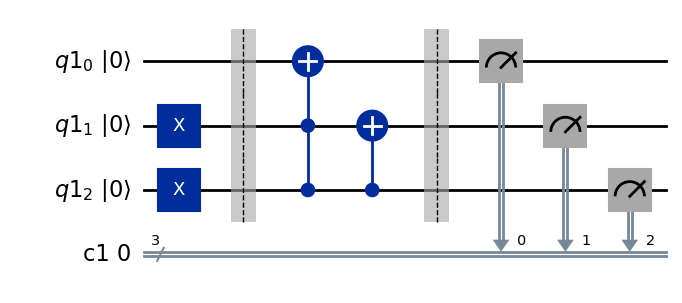

In [10]:
toffoli.draw(output='mpl', initial_state=True)

### Running the circuit on the local qasm simulator

In [11]:
from qiskit_aer import Aer

simulator = Aer.get_backend('qasm_simulator')

In [12]:
# We've set the number of shots (repeats) of the circuit to be 4096.
# (The default number of shots on the simulator is 1024.)
job_sim_toffoli = simulator.run(toffoli, shots=4096)

In [13]:
# Grab the results from the job
result_sim_toffoli = job_sim_toffoli.result()

In [14]:
counts_sim_toffoli = result_sim_toffoli.get_counts()
print(counts_sim_toffoli)

{'101': 4096}


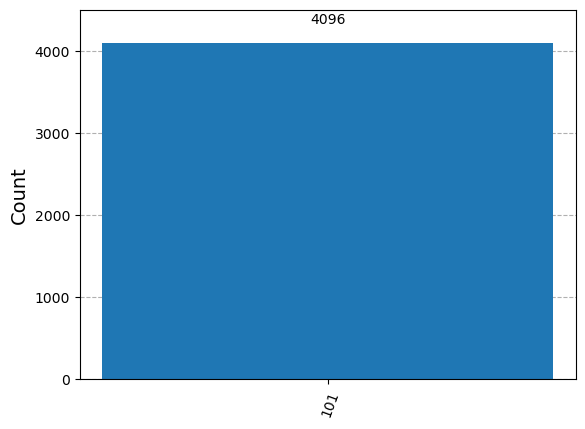

In [15]:
# Plot a histogram of the results
from qiskit.visualization import plot_histogram
plot_histogram(counts_sim_toffoli)

### Explain what the circuit does
The circuit prepares state 101 from the initial state 000  and calculates its  probability after measurement  and obtains  a probability of 1

### Part (b)

Re-run the circuit on the simulator. Do the results change? Why or why not?

 No because it does the same operation as in the first simulator i.e prepares the same state 101 and gives its probability

In [16]:
job_sim_toffoli = simulator.run(toffoli, shots=4096)
result_sim_toffoli = job_sim_toffoli.result()
counts_sim_toffoli = result_sim_toffoli.get_counts()
print(counts_sim_toffoli)

{'101': 4096}


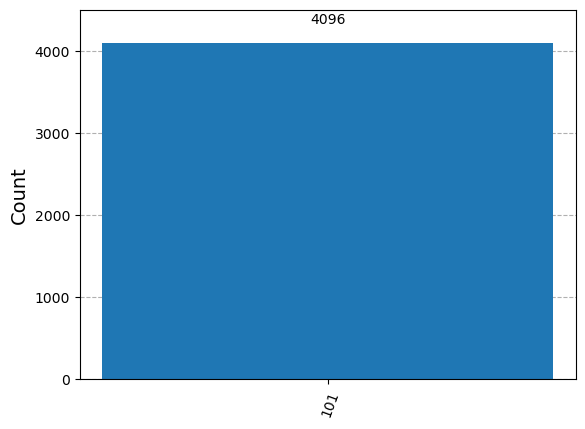

In [17]:
from qiskit.visualization import plot_histogram
plot_histogram(counts_sim_toffoli)

### Part (c)       
Finally, run the circuit on a real device. Compare with the simulation, and account for differences.
## Comparison
The simulation only prepares the state 101 and calculate its probability after measurement.However the real device prepares all the states and calculates their probabilities after measurement. 
A real device accounts for errors whereas a simulator does  exact calculations and therefore more precise than a real device.

### Running the circuit on a real device 

In [13]:
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler

In [14]:
# The FIRST time that you run on an IBM backend, you must save your account number, as follows:
#QiskitRuntimeService.save_account(token="abd3dfea69f9c7488158d721ecd2c07774f10644c60ebc5248b5c7da7e95e5858bbe1259b2e8639890034a3b064f6116d23f8a3022511119ef61d2f4a7d8ccf3", channel ='ibm_quantum')

In [62]:
# Loads your personal account number, which you have previously saved
service = QiskitRuntimeService()

In [63]:
# Available IBM devices that are NOT a simulator
service.backends(simulator=False, operational=True)

/srv/sage-10.4/local/var/lib/sage/venv-python3.11/lib/python3.11/site-packages/qiskit/qobj/pulse_qobj.py:273: DeprecationWarning: The class ``qiskit.qobj.pulse_qobj.PulseQobjInstruction`` is deprecated as of qiskit 1.2. It will be removed in the 2.0 release. The `Qobj` class and related functionality are part of the deprecated `BackendV1` workflow,  and no longer necessary for `BackendV2`. If a user workflow requires `Qobj` it likely relies on deprecated functionality and should be updated to use `BackendV2`.
  return cls(data["name"], data["t0"], **in_data)
/srv/sage-10.4/local/var/lib/sage/venv-python3.11/lib/python3.11/site-packages/qiskit/qobj/pulse_qobj.py:576: DeprecationWarning: The class ``qiskit.qobj.pulse_qobj.PulseLibraryItem`` is deprecated as of qiskit 1.2. It will be removed in the 2.0 release. The `Qobj` class and related functionality are part of the deprecated `BackendV1` workflow,  and no longer necessary for `BackendV2`. If a user workflow requires `Qobj` it likely r

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_kyiv')>,
 <IBMBackend('ibm_sherbrooke')>]

In [64]:
# We choose the least-busy IBM device that is NOT a simulator
backend = service.least_busy(simulator=False, operational=True)

In [18]:
backend.name

'ibm_brisbane'

In [19]:
# Alternative:
# backend = service.backend("ibm_brisbane")

In [20]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

In [65]:
# we use a transpiler to get an ISA circuit
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_toffoli = pm.run(toffoli)

In [66]:
# We initialize the Sampler, and invoke the run() method to generate the output
# The default number of shots on the Sampler is 4096
sampler = Sampler(backend)
job_exp_toffoli = sampler.run([isa_toffoli])

In [67]:
jobid = job_exp_toffoli.job_id()
jobid

'cx852gatpsjg008c6xzg'

In [73]:
job_exp_toffoli.status()

'DONE'

You can monitor your job (for example, view the estimated time for it to finish, or even cancel it) by pointing your browser to your personal IBM Quantum Platform homepage

     https://quantum.ibm.com

 and then clicking on "Workloads". 

In [30]:
job_exp_toffoli.status()

'DONE'

In [31]:
# If there is an error, you can get more information:
#job_exp_toffoli.error_message()

If you need to retrieve a job that already finished running:

Look up (on your Workloads page, see above) the job ID (here, cw7cyjajyrs0008gparg ).
Then:

jobid='cw7cyjajyrs0008gparg'

retrieved_job = service.job(jobid)

result_exp_toffoli = retrieved_job.result()

In [69]:
result_exp_toffoli = job_exp_toffoli.result()

In [70]:
print(result_exp_toffoli[0].data)
#See https://quantumcomputing.stackexchange.com/questions/38780/how-to-run-the-qiskit-sampler-after-storing-measurement-results-on-classical-qub

DataBin(c0=BitArray(<shape=(), num_shots=4096, num_bits=3>))


In [71]:
counts_exp_toffoli = result_exp_toffoli[0].data.c0.get_counts()
print(counts_exp_toffoli)

{'101': 3701, '100': 141, '010': 82, '111': 55, '110': 41, '001': 32, '011': 43, '000': 1}


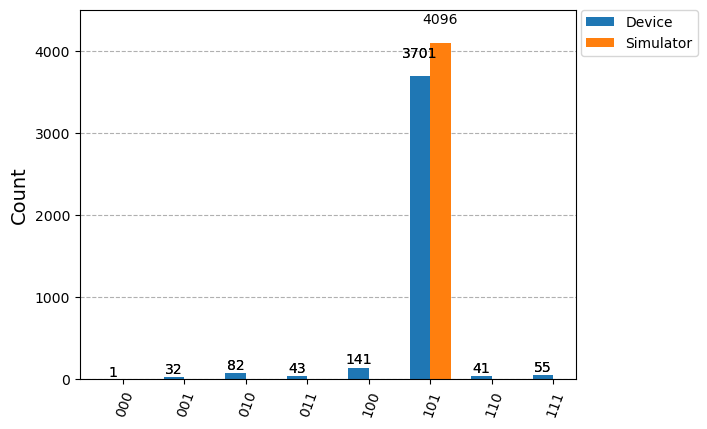

In [72]:
plot_histogram([counts_exp_toffoli,counts_sim_toffoli], legend=['Device', 'Simulator'])

## 2. Bell circuit

### Part (a)

Begin by running this circuit on the simulator.

### Creating the circuit

In [18]:
# from qiskit import *

In [19]:
q=QuantumRegister(2)
c=ClassicalRegister(2)
bell = QuantumCircuit(q,c)
bell.h(q[0])
bell.cx(q[0],q[1])
bell.barrier()
bell.measure(q, c)

### Visualizing the circuit

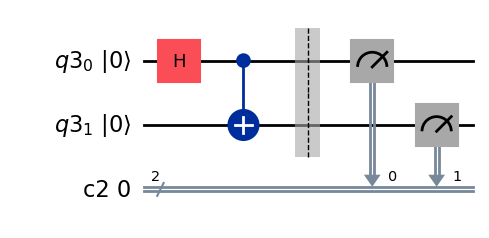

In [20]:
bell.draw(output='mpl', initial_state=True)

### Running the circuit on the local qasm simulator

In [21]:
# from qiskit_aer import Aer
# simulator = Aer.get_backend('qasm_simulator')

In [22]:
job_sim_bell = simulator.run(bell, shots=4096)
result_sim_bell = job_sim_bell.result()
counts_sim_bell = result_sim_bell.get_counts()
print(counts_sim_bell)

{'11': 2039, '00': 2057}


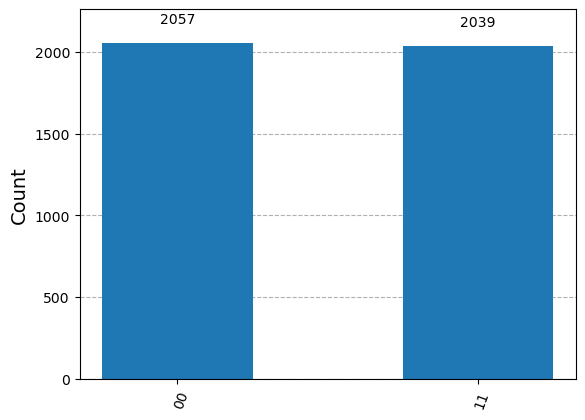

In [23]:
# from qiskit.visualization import plot_histogram
plot_histogram(counts_sim_bell)

### Explain what the circuit does
The circuit prepares the states 00 and state 11 and calculates its probabilities after measurement which is 1/2 for both states.


### Part (b) 

Re-run the circuit on the simulator. Do the results change? Why or why not?

No they dont change. Because the operations on the circuit gives 100% calculations as the first calculation


In [24]:
job_sim_bell = simulator.run(bell, shots=4096)
result_sim_bell = job_sim_bell.result()
counts_sim_bell = result_sim_bell.get_counts()
print(counts_sim_bell)

{'11': 2081, '00': 2015}


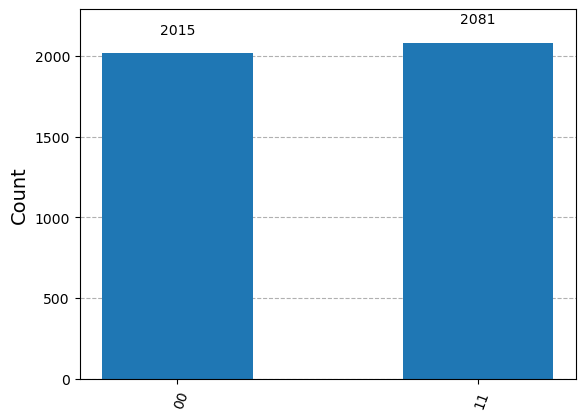

In [25]:
# from qiskit.visualization import plot_histogram
plot_histogram(counts_sim_bell)

### Part (c)

Finally, run the circuit on a real device. Compare with the simulation, and account for differences.

The simulation only prepares the state 00 and state 11 and calculate their probability after measurement.
However the real device prepares all the states and calculates thir probabilities after measurement. 

A real device accounts for errors whereas a simulator does  exact calculations and therefore more precise than a real device.

### Running the circuit on a real device

In [44]:
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
service = QiskitRuntimeService()
backend = service.least_busy(simulator=False, operational=True)
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
sampler = Sampler(backend)

/srv/sage-10.4/local/var/lib/sage/venv-python3.11/lib/python3.11/site-packages/qiskit/qobj/pulse_qobj.py:273: DeprecationWarning: The class ``qiskit.qobj.pulse_qobj.PulseQobjInstruction`` is deprecated as of qiskit 1.2. It will be removed in the 2.0 release. The `Qobj` class and related functionality are part of the deprecated `BackendV1` workflow,  and no longer necessary for `BackendV2`. If a user workflow requires `Qobj` it likely relies on deprecated functionality and should be updated to use `BackendV2`.
  return cls(data["name"], data["t0"], **in_data)
/srv/sage-10.4/local/var/lib/sage/venv-python3.11/lib/python3.11/site-packages/qiskit/qobj/pulse_qobj.py:576: DeprecationWarning: The class ``qiskit.qobj.pulse_qobj.PulseLibraryItem`` is deprecated as of qiskit 1.2. It will be removed in the 2.0 release. The `Qobj` class and related functionality are part of the deprecated `BackendV1` workflow,  and no longer necessary for `BackendV2`. If a user workflow requires `Qobj` it likely r

In [45]:
backend.name

'ibm_brisbane'

In [46]:
isa_bell = pm.run(bell)

In [47]:

job_exp_bell = sampler.run([isa_bell])

In [48]:
jobid = job_exp_bell.job_id()
jobid

'cx9zvcnpx23g008bx2j0'

In [54]:
job_exp_bell.status()

'DONE'

In [55]:
job_exp_bell.status()

'DONE'

In [56]:
result_exp_bell = job_exp_bell.result()

In [57]:
print(result_exp_bell[0].data)

DataBin(c2=BitArray(<shape=(), num_shots=4096, num_bits=2>))


In [59]:
counts_exp_bell = result_exp_bell[0].data.c2.get_counts()
print(counts_exp_bell)

{'11': 1980, '00': 1717, '01': 206, '10': 193}


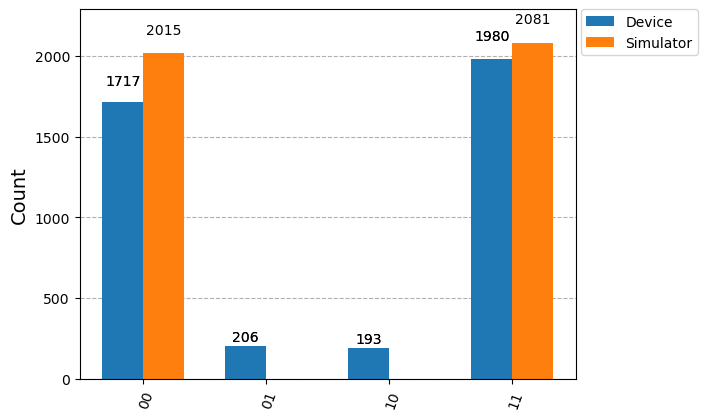

In [60]:
plot_histogram([counts_exp_bell,counts_sim_bell], legend=['Device', 'Simulator'])

## 3. Dense coding circuits

### Part (a)

Run the circuit for the case 11 on the simulator. Does it give the expected result?
Yes

#### The case 11

In [141]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
dense11 = QuantumCircuit(q,c)
# We create an entangled pair of qubits; Alice has one (q[0]) , and Bob has the other one (q[1])
dense11.h(q[0])
dense11.cx(q[0], q[1])
dense11.barrier()
# To send the message 11, Alice applies first X and then Z to her qubit
dense11.x(q[0])
dense11.z(q[0])
dense11.barrier()
# Alice now sends her qubit to Bob
# Now that Bob has both qubits, he proceeds to retrieve Alice's message 
# Bob applies a cNOT and then H
dense11.cx(q[0], q[1])
dense11.h(q[0])
dense11.barrier()
# Bob then measures both qubits
dense11.measure(q, c)

### Visualizing the circuit

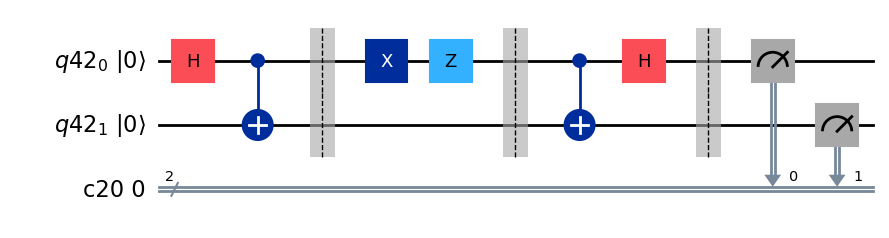

In [142]:
dense11.draw(output='mpl', initial_state=True)

### Running the circuit on the local qasm simulator

In [75]:
job_sim_dense11 = simulator.run(dense11, shots=4096)
result_sim_dense11 = job_sim_dense11.result()
counts_sim_dense11 = result_sim_dense11.get_counts()
print(counts_sim_dense11)

{'11': 4096}


### Explain briefly what the circuit does
This  circuit shows a quantum  protocol for transmitting 2 bits of information using only 1 qubit where Alice and Bob use  quantum entanglement and quantum operations to transmit  classical message encoded on  Alice's qubit and Bob applies operations to decode the classical message and retrieve information.
The circuit starts by first  reating a  Hadamard gate on Alice's qubit and a CNOT gate between Alice and Bob's qubit.Alice then applies the X then Z gate then sends her qubit to Bob.Bob applies a CNOT and Hadamard gate on his qubit then measures both qubits to encode the classical information


### Part (b)

Modify the code, and run on the simulator, for the other three cases (namely, 01, 10 and 00). Make sure the circuits are drawn for each of the cases. Do you obtain the expected results?

Yes


#### The case 01

In [89]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
dense01 = QuantumCircuit(q,c)
# We create an entangled pair of qubits; Alice has one (q[0]) , and Bob has the other one (q[1])
dense01.h(q[0])
dense01.cx(q[0], q[1])
dense01.barrier()
# To send the message 11, Alice applies Z to her qubit
dense01.z(q[0])
dense01.barrier()
# Alice now sends her qubit to Bob
# Now that Bob has both qubits, he proceeds to retrieve Alice's message 
# Bob applies a cNOT and then H
dense01.cx(q[0], q[1])
dense01.h(q[0])
dense01.barrier()
# Bob then measures both qubits
dense01.measure(q, c)

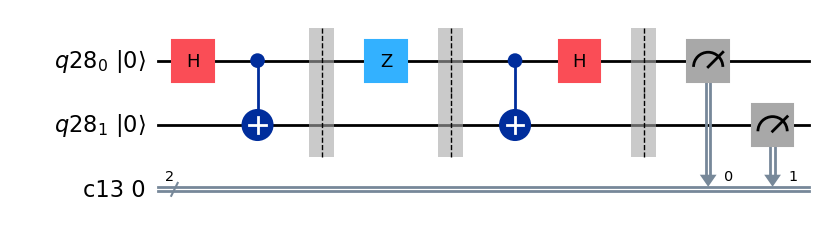

In [90]:
dense01.draw(output='mpl', initial_state=True)

In [93]:
job_sim_dense01 = simulator.run(dense01, shots=4096)
result_sim_dense01 = job_sim_dense01.result()
counts_sim_dense01 = result_sim_dense01.get_counts()
print(counts_sim_dense01)

{'01': 4096}


#### The case 10


In [95]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
dense10 = QuantumCircuit(q,c)
# We create an entangled pair of qubits; Alice has one (q[0]) , and Bob has the other one (q[1])
dense10.h(q[0])
dense10.cx(q[0], q[1])
dense10.barrier()
# To send the message 11, Alice applies X to her qubit
dense10.x(q[0])
dense10.barrier()
# Alice now sends her qubit to Bob
# Now that Bob has both qubits, he proceeds to retrieve Alice's message 
# Bob applies a cNOT and then H
dense10.cx(q[0], q[1])
dense10.h(q[0])
dense10.barrier()
# Bob then measures both qubits
dense10.measure(q, c)

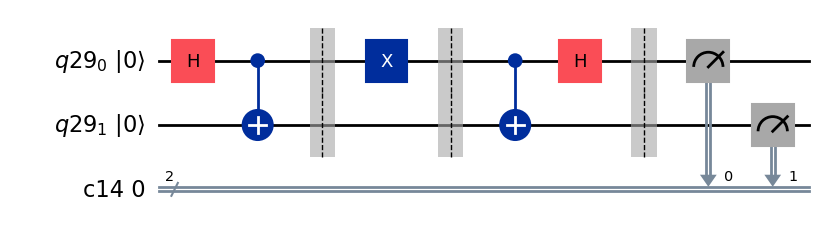

In [96]:
dense10.draw(output='mpl', initial_state=True)

In [97]:
job_sim_dense10 = simulator.run(dense10, shots=4096)
result_sim_dense10 = job_sim_dense10.result()
counts_sim_dense10 = result_sim_dense10.get_counts()
print(counts_sim_dense10)

{'10': 4096}


#### The case 00

In [99]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
dense00 = QuantumCircuit(q,c)
# We create an entangled pair of qubits; Alice has one (q[0]) , and Bob has the other one (q[1])
dense00.h(q[0])
dense00.cx(q[0], q[1])
dense00.barrier()
# To send the message 00, Alice applies I to her qubit But I has no effect on the qubit
# Alice now sends her qubit to Bob
# Now that Bob has both qubits, he proceeds to retrieve Alice's message 
# Bob applies a cNOT and then H
dense00.cx(q[0], q[1])
dense00.h(q[0])
dense00.barrier()
# Bob then measures both qubits
dense00.measure(q, c)

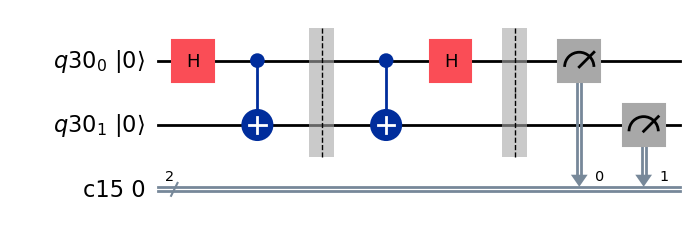

In [100]:
dense00.draw(output='mpl', initial_state=True)

In [101]:
job_sim_dense00 = simulator.run(dense00, shots=4096)
result_sim_dense00 = job_sim_dense00.result()
counts_sim_dense00 = result_sim_dense00.get_counts()
print(counts_sim_dense00)

{'00': 4096}


### Part (c) 

Run the circuit for the case 11 on a real device; compare with the simulation, and account for differences.

### Running the circuit on a real device

In [102]:
service.backends(simulator=False, operational=True)

/srv/sage-10.4/local/var/lib/sage/venv-python3.11/lib/python3.11/site-packages/qiskit/qobj/pulse_qobj.py:273: DeprecationWarning: The class ``qiskit.qobj.pulse_qobj.PulseQobjInstruction`` is deprecated as of qiskit 1.2. It will be removed in the 2.0 release. The `Qobj` class and related functionality are part of the deprecated `BackendV1` workflow,  and no longer necessary for `BackendV2`. If a user workflow requires `Qobj` it likely relies on deprecated functionality and should be updated to use `BackendV2`.
  return cls(data["name"], data["t0"], **in_data)
/srv/sage-10.4/local/var/lib/sage/venv-python3.11/lib/python3.11/site-packages/qiskit/qobj/pulse_qobj.py:576: DeprecationWarning: The class ``qiskit.qobj.pulse_qobj.PulseLibraryItem`` is deprecated as of qiskit 1.2. It will be removed in the 2.0 release. The `Qobj` class and related functionality are part of the deprecated `BackendV1` workflow,  and no longer necessary for `BackendV2`. If a user workflow requires `Qobj` it likely r

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_kyiv')>,
 <IBMBackend('ibm_sherbrooke')>]

In [ ]:

backend = service.least_busy(simulator=False, operational=True) # choose the least-busy IBM device that is NOT a simulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
sampler = Sampler(backend)

In [105]:
backend.name

'ibm_brisbane'

In [107]:
isa_dense11 = pm.run(dense11)

In [108]:
job_exp_dense11 = sampler.run([isa_dense11])

In [109]:
jobid = job_exp_dense11.job_id()
jobid

'cxa16zbpjw30008h5ab0'

In [130]:
job_exp_dense11.status()

'DONE'

In [131]:
job_exp_dense11.status()

'DONE'

In [143]:
result_exp_dense11 = job_exp_dense11.result()

In [144]:
print(result_exp_dense11[0].data)

DataBin(c11=BitArray(<shape=(), num_shots=4096, num_bits=2>))


In [157]:
counts_exp_dense11 = result_exp_dense11[0].data.c11.get_counts()
print(counts_exp_dense11)

{'10': 3724, '00': 161, '11': 194, '01': 17}


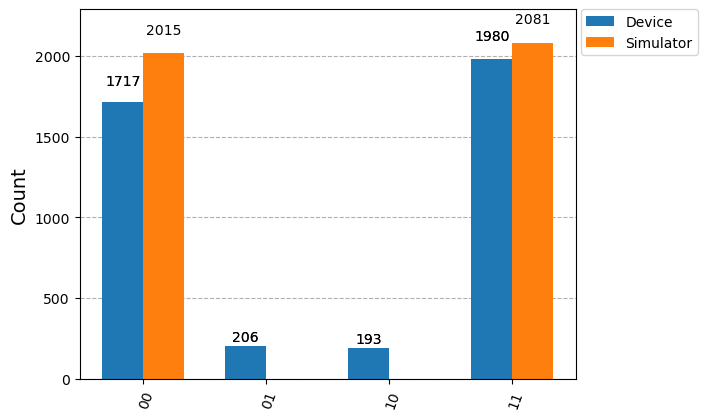

In [158]:
plot_histogram([counts_exp_bell,counts_sim_bell], legend=['Device', 'Simulator'])

# Accounting for differences
The real device gives the probability of all possible states after measurement where as the simulator gives the probability of only one state based on the initial state of the qubits.

The real device accounts for errors but the simulator gives exact calculations.

## 4. Teleportation


Consider the teleportation circuit.
Note that the ``unknown'' state here is given by

$$ |\psi\rangle = R^{(y)}(\alpha) |0\rangle
   = e^{i \alpha\, \sigma^{y} /2} |0\rangle = 
   \cos(\tfrac{\alpha}{2}) |0\rangle  - \sin(\tfrac{ \alpha}{2}) 
     |1\rangle  $$

with $\alpha=\pi/4$. (Recall Equations (7) and (8) in Problem Set 1 !)

### Part (a)

For the state $|\psi\rangle$, compute the probabilities

$$ \big\vert\langle 0|\psi\rangle\big\vert^{2}  \qquad \text{ and } 
	\qquad \big\vert\langle 1|\psi\rangle\big\vert^{2}  $$

of measuring 0 and 1, respectively.


$$
|\psi\rangle = \cos\left(\tfrac{\alpha}{2}\right) |0\rangle - \sin\left(\tfrac{\alpha}{2}\right) |1\rangle
$$
 $$\psi\rangle = \cos\left(\tfrac{\alpha}{2}\right)*\begin{pmatrix} 
1 \\
0 \\
\end{pmatrix} - \sin\left(\tfrac{\alpha}{2}\right)*\begin{pmatrix} 
0 \\
1 \\
\end{pmatrix}$$
$$= \begin{pmatrix}
\cos\left(\tfrac{\alpha}{2}\right) \\
-\sin\left(\tfrac{\alpha}{2}\right) \\
\end{pmatrix} $$

Measuring 0 and evaluating with $\alpha=\pi/4$ 
$$=\langle 0|\psi\rangle= (1  0)*\begin{pmatrix}
\cos\left(\tfrac{\pi}{8}\right) \\
-\sin\left(\tfrac{\pi}{8}\right) \\
\end{pmatrix}$$
$$= \cos\left(\tfrac{\pi}{8}\right)$$

Probability of measuring 0:
$$
\big\vert \langle 0|\psi\rangle \big\vert^{2} = \left( \cos\left(\tfrac{\pi}{8}\right) \right)^2 = \cos^2\left(\tfrac{\pi}{8}\right)  \approx 0.85
$$




Measuring 1 and evaluating with $\alpha=\pi/4$ 
$$=\langle 1|\psi\rangle= (0 1)*\begin{pmatrix}
\cos\left(\tfrac{\pi}{8}\right) \\
-\sin\left(\tfrac{\pi}{8}\right) \\
\end{pmatrix}$$
$$= \sin\left(\tfrac{\pi}{8}\right)$$

Probability of measuring 1:
$$
\big\vert \langle 1|\psi\rangle \big\vert^{2} = \left( \sin\left(\tfrac{\pi}{8}\right) \right)^2 = \sin^2\left(\tfrac{\pi}{8}\right)  \approx 0.15
$$



### Part (b)

Run this circuit on the simulator.

### Creating the circuit

In [159]:
# from qiskit import *

In [184]:
# We need 3 qubits: one qubit for the "unknown" state to be teleported, and two qubits for the entangled pair
q = QuantumRegister(3)
# corresponding classical registers
c0 = ClassicalRegister(1)
c1 = ClassicalRegister(1)
c2 = ClassicalRegister(1)
teleport = QuantumCircuit(q,c0,c1,c2)

In [185]:
# We create Alice's "unknown" state that she wants to teleport to Bob
# As an example, we take the "unknown" state to be a rotation about the y-axis by angle pi/4 of |0>
# ry() is a 1-qubit gate that performs the rotation
# We call NumPy with "np" to evaluate pi/4
import numpy as np
teleport.ry(np.pi/4,q[0])
teleport.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'q44'), 0), Qubit(QuantumRegister(3, 'q44'), 1), Qubit(QuantumRegister(3, 'q44'), 2)), clbits=())

In [186]:
# We create an entangled pair of qubits; Alice has one, and Bob has the other one
teleport.h(q[1])
teleport.cx(q[1], q[2])
teleport.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'q44'), 0), Qubit(QuantumRegister(3, 'q44'), 1), Qubit(QuantumRegister(3, 'q44'), 2)), clbits=())

In [187]:
# We now implement the teleportation protocol:
# Alice applies a cNOT to her two qubits, with the control on the qubit in the "unknown" state
teleport.cx(q[0], q[1])
# Alice then applies a Hadamard to the qubit in the "unknown" state
teleport.h(q[0])
teleport.barrier()
# Alice measures both of her qubits
teleport.measure(q[0], c0)
teleport.measure(q[1], c1)
# Depending on the results of Alice's measurements, Bob applies an X or Z, or both, to his qubit
teleport.x(q[2]).c_if(c1, 1)
teleport.z(q[2]).c_if(c0, 1)
# Bob's qubit should now be in the same "unknown" state, which can be verified by measurement:
teleport.measure(q[2], c2)

### Visualizing the circuit

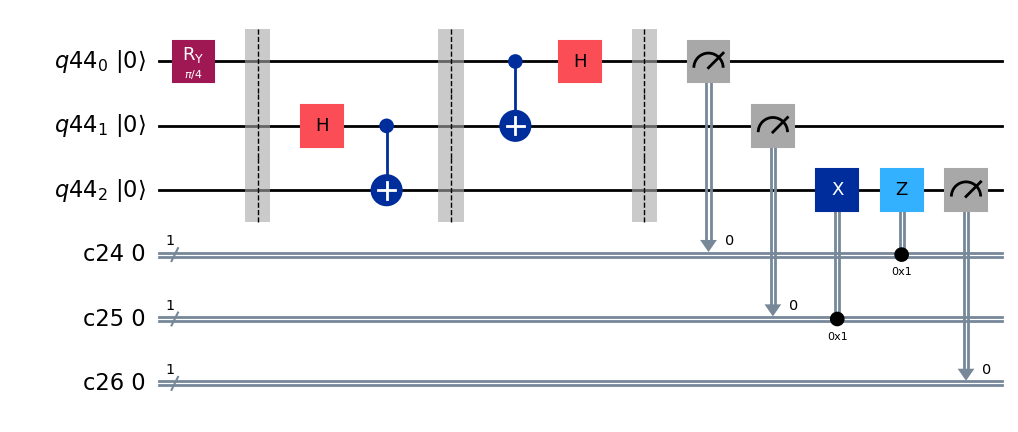

In [188]:
teleport.draw(output='mpl', initial_state=True)

### Running the circuit on the local qasm simulator

In [189]:
teleport_job = simulator.run(teleport, shots=4096)
teleport_result = teleport_job.result()
data = teleport_result.get_counts(teleport)
# Results of measurements of all 3 qubits
print(data)

{'1 1 0': 152, '1 0 1': 146, '0 1 1': 878, '1 1 1': 159, '1 0 0': 164, '0 0 1': 881, '0 0 0': 883, '0 1 0': 833}


In [190]:
# The results of Bob's measurements (c2) are contained in the LEFTmost classical register
# We must sum over all the possible results of Alice's measurements 
# (contained in the middle and rightmost classical registers) to obtain the totals
bob = {}
bob['0'] = data['0 0 0'] + data['0 0 1'] + data['0 1 0'] + data['0 1 1']
bob['1'] = data['1 0 0'] + data['1 0 1'] + data['1 1 0'] + data['1 1 1']

In [191]:
print(bob)

{'0': 3475, '1': 621}


In [192]:
bob['0'] + bob['1'] 

4096

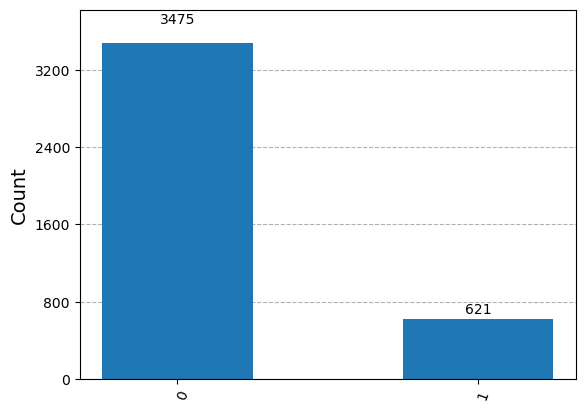

In [193]:
plot_histogram(bob)

### Explain briefly what this circuit does
This  circuit shows a quantum teleportation protocol for transfering an unknown state from Alice to Bob without any  physical matter transfer using quantum entanglement between Alice and Bob's qubit.Alice performs a Bell state measurement on her qubit  which provide classical bits of information received by Bob.Bob then applies quantum gates to his qubit to transform it to the initial state of  Alice's qubit.

### Part (c)

How do your results compare with the theoretical prediction?

From the theoretical prediction,the probability of measuring state 0 and state 1 is approximately 85% and 15% respectively which is close to the results from the simulator as shown in the histogram above.